In [25]:
import sys
from pathlib import Path

# Agregar el directorio raíz del proyecto al PYTHONPATH
project_root = Path().resolve().parent
sys.path.insert(0, str(project_root))

# Forecast

In [26]:
from src.data_source import DataSource

data_load = DataSource()
data = data_load.load()

In [27]:
data.sales_daily().fecha.max()

Timestamp('2024-03-31 00:00:00')

In [28]:
data.ventas.head()

,fecha,id_tienda,id_producto,unidades_vendidas
0,2024-01-01,STORE_01,PROD_001,5
1,2024-01-02,STORE_01,PROD_001,4
2,2024-01-03,STORE_01,PROD_001,3
3,2024-01-04,STORE_01,PROD_001,4
4,2024-01-05,STORE_01,PROD_001,10


In [29]:
print(data.sales_daily().shape)
data.sales_daily().head()

(14560, 4)


,id_tienda,id_producto,fecha,unidades_vendidas
0,STORE_01,PROD_001,2024-01-01,5
1,STORE_01,PROD_001,2024-01-02,4
2,STORE_01,PROD_001,2024-01-03,3
3,STORE_01,PROD_001,2024-01-04,4
4,STORE_01,PROD_001,2024-01-05,10


# Prophet entrenamiento y pronostico semanal

In [30]:
from src.forecast import DemandForecaster

forecaster = DemandForecaster()
forecaster_results = forecaster.fit_predict_week(data.sales_daily())
forecaster_results

15:35:15 - cmdstanpy - INFO - Chain [1] start processing
15:35:15 - cmdstanpy - INFO - Chain [1] done processing
15:35:15 - cmdstanpy - INFO - Chain [1] start processing
15:35:15 - cmdstanpy - INFO - Chain [1] done processing
15:35:15 - cmdstanpy - INFO - Chain [1] start processing
15:35:15 - cmdstanpy - INFO - Chain [1] done processing
15:35:15 - cmdstanpy - INFO - Chain [1] start processing
15:35:15 - cmdstanpy - INFO - Chain [1] done processing
15:35:15 - cmdstanpy - INFO - Chain [1] start processing
15:35:15 - cmdstanpy - INFO - Chain [1] done processing
15:35:15 - cmdstanpy - INFO - Chain [1] start processing
15:35:15 - cmdstanpy - INFO - Chain [1] done processing
15:35:15 - cmdstanpy - INFO - Chain [1] start processing
15:35:15 - cmdstanpy - INFO - Chain [1] done processing
15:35:15 - cmdstanpy - INFO - Chain [1] start processing
15:35:15 - cmdstanpy - INFO - Chain [1] done processing
15:35:15 - cmdstanpy - INFO - Chain [1] start processing
15:35:15 - cmdstanpy - INFO - Chain [1]

,id_tienda,id_producto,mu_semana,sigma_semana,last_date
0,STORE_01,PROD_001,47.306966,7.047481,2024-04-07
1,STORE_01,PROD_002,65.756343,10.694214,2024-04-07
2,STORE_01,PROD_003,63.074943,8.725394,2024-04-07
3,STORE_01,PROD_004,51.389481,7.182637,2024-04-07
4,STORE_01,PROD_005,66.008114,9.914347,2024-04-07
...,...,...,...,...,...
155,STORE_20,PROD_004,44.761374,7.912548,2024-04-07
156,STORE_20,PROD_005,128.895794,9.482509,2024-04-07
157,STORE_20,PROD_006,158.186927,10.889507,2024-04-07
158,STORE_20,PROD_007,125.446620,11.744259,2024-04-07


## Resultados de la prediccion por tienda producto

In [31]:
forecaster_results

,id_tienda,id_producto,mu_semana,sigma_semana,last_date
0,STORE_01,PROD_001,47.306966,7.047481,2024-04-07
1,STORE_01,PROD_002,65.756343,10.694214,2024-04-07
2,STORE_01,PROD_003,63.074943,8.725394,2024-04-07
3,STORE_01,PROD_004,51.389481,7.182637,2024-04-07
4,STORE_01,PROD_005,66.008114,9.914347,2024-04-07
...,...,...,...,...,...
155,STORE_20,PROD_004,44.761374,7.912548,2024-04-07
156,STORE_20,PROD_005,128.895794,9.482509,2024-04-07
157,STORE_20,PROD_006,158.186927,10.889507,2024-04-07
158,STORE_20,PROD_007,125.446620,11.744259,2024-04-07


15:35:31 - cmdstanpy - INFO - Chain [1] start processing
15:35:31 - cmdstanpy - INFO - Chain [1] done processing


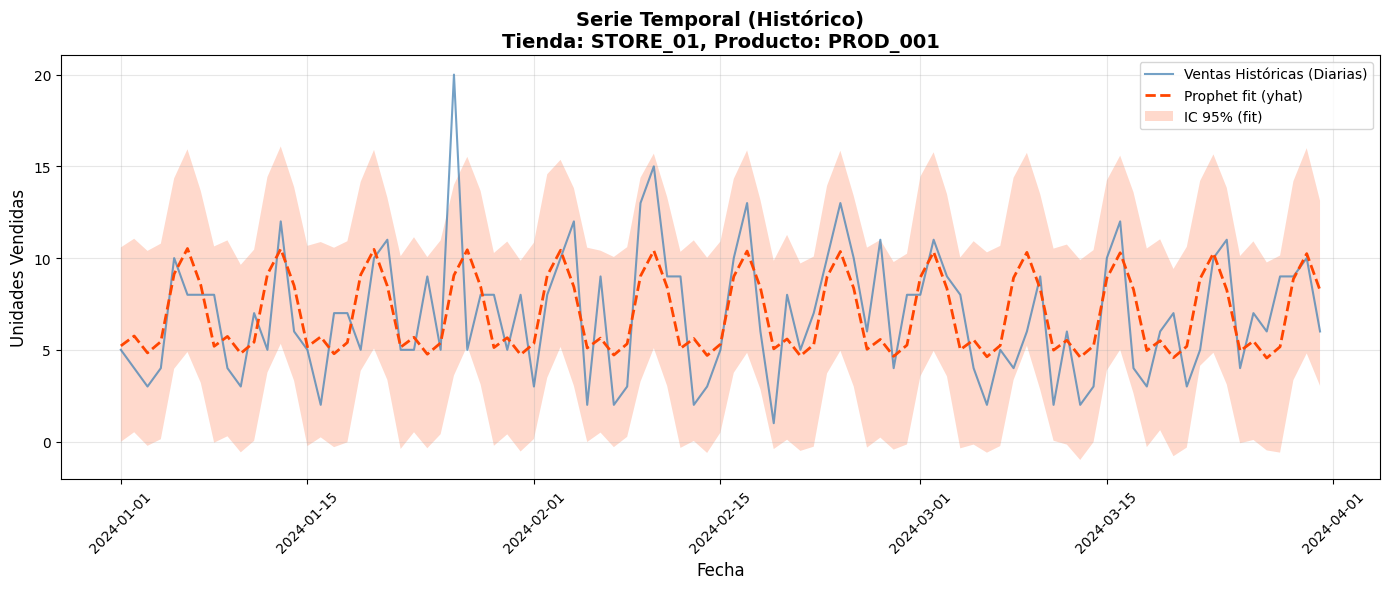

In [32]:
from matplotlib import pyplot as plt

sales = data.sales_daily()
fig1 = forecaster.plot_time_series(sales, 'STORE_01', 'PROD_001')
plt.show()

15:35:31 - cmdstanpy - INFO - Chain [1] start processing
15:35:31 - cmdstanpy - INFO - Chain [1] done processing


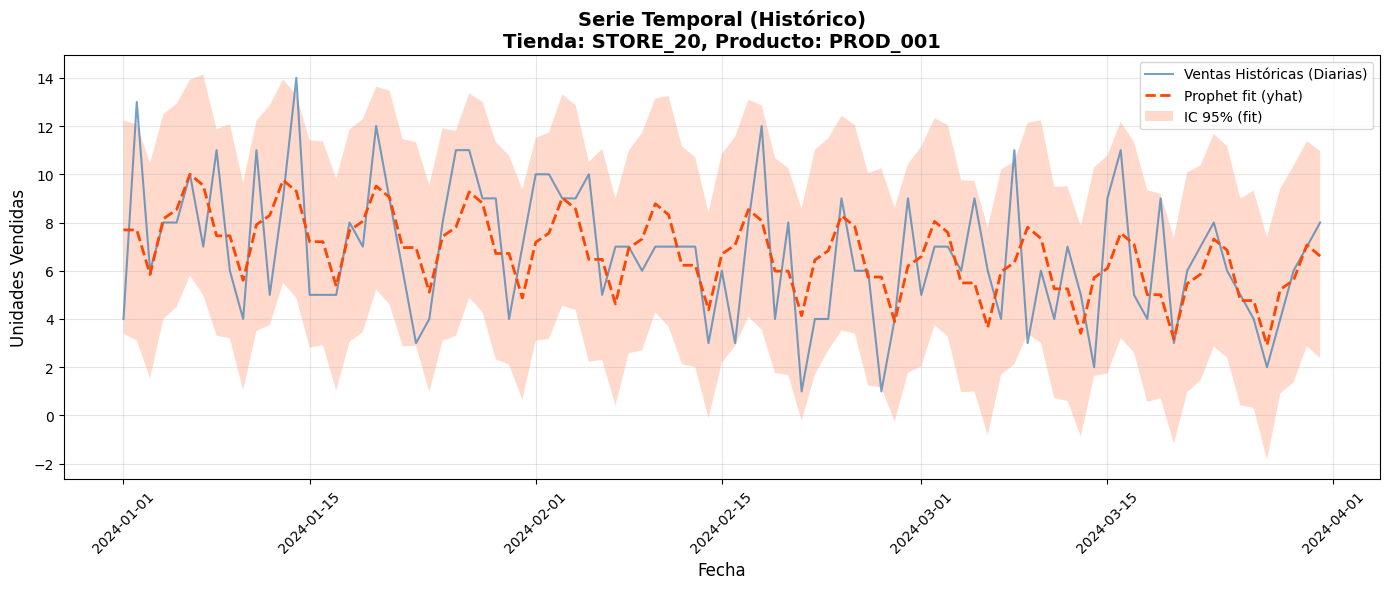

In [33]:
sales = data.sales_daily()
fig1 = forecaster.plot_time_series(sales, 'STORE_20', 'PROD_001')
plt.show()

In [34]:
sales.id_tienda.unique()

array(['STORE_01', 'STORE_02', 'STORE_03', 'STORE_04', 'STORE_05',
       'STORE_06', 'STORE_07', 'STORE_08', 'STORE_09', 'STORE_10',
       'STORE_11', 'STORE_12', 'STORE_13', 'STORE_14', 'STORE_15',
       'STORE_16', 'STORE_17', 'STORE_18', 'STORE_19', 'STORE_20'],
      dtype=object)

15:35:31 - cmdstanpy - INFO - Chain [1] start processing
15:35:32 - cmdstanpy - INFO - Chain [1] done processing


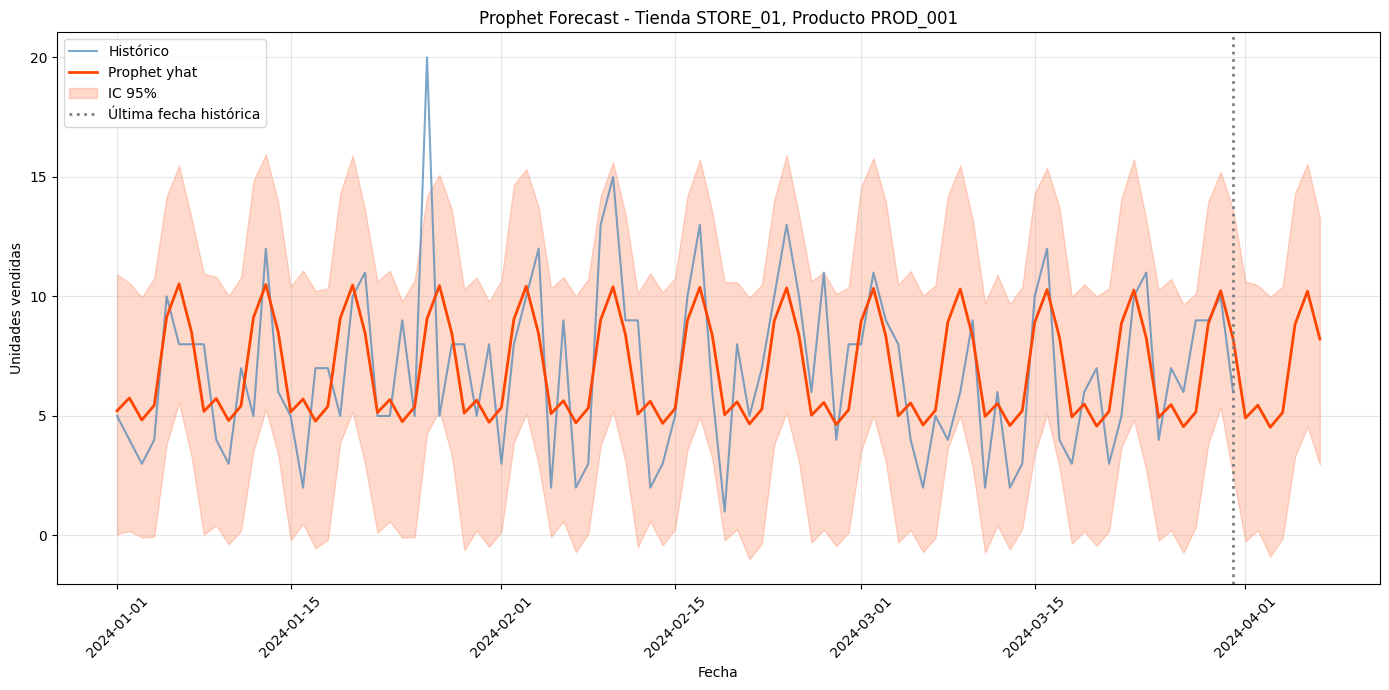

In [35]:
fig2 = forecaster.plot_forecast_with_intervals(
    sales, 'STORE_01', 'PROD_001', horizon_days=7
)
plt.show()

15:35:32 - cmdstanpy - INFO - Chain [1] start processing
15:35:32 - cmdstanpy - INFO - Chain [1] done processing
15:35:32 - cmdstanpy - INFO - Chain [1] start processing
15:35:32 - cmdstanpy - INFO - Chain [1] done processing
15:35:32 - cmdstanpy - INFO - Chain [1] start processing
15:35:32 - cmdstanpy - INFO - Chain [1] done processing


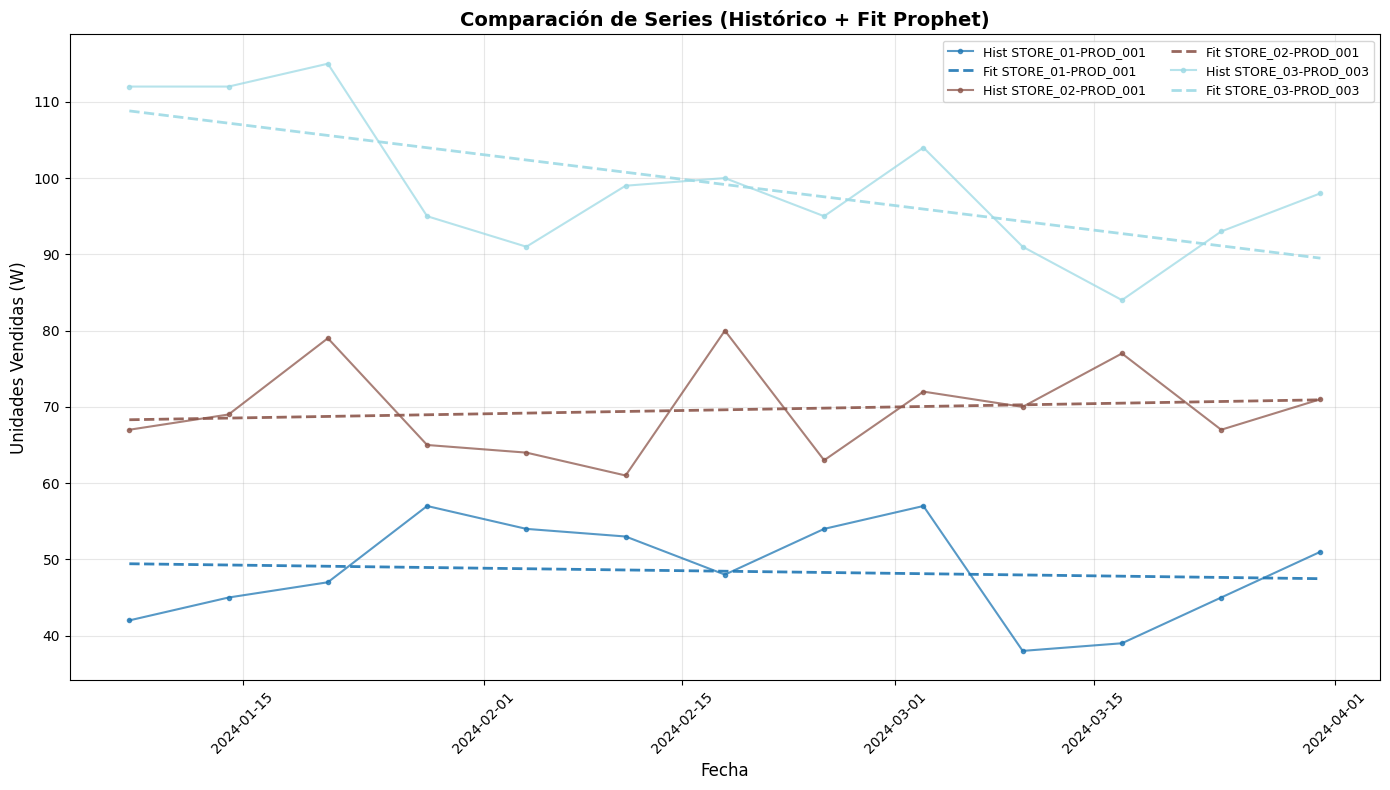

In [36]:
combinations = [('STORE_01', 'PROD_001'), ('STORE_02', 'PROD_001'), ('STORE_03', 'PROD_003')]
fig3 = forecaster.plot_multiple_series(sales, combinations, resample_freq='W')
plt.show()

# Análisis de Insights del Pronóstico de Demanda

## 1. Análisis Descriptivo de Pronósticos

En esta sección se caracterizarán estadísticamente los resultados del modelo de pronóstico semanal basado en Prophet.

In [37]:
# Análisis Estadístico Descriptivo de los Pronósticos
import numpy as np
import pandas as pd

# Calcular estadísticas descriptivas globales
stats_descriptivas = {
    'Métrica': ['Media', 'Mediana', 'Desviación Estándar', 'Mínimo', 'Percentil 25', 
                'Percentil 75', 'Máximo', 'Rango Intercuartílico'],
    'Demanda Semanal (mu_semana)': [
        forecaster_results['mu_semana'].mean(),
        forecaster_results['mu_semana'].median(),
        forecaster_results['mu_semana'].std(),
        forecaster_results['mu_semana'].min(),
        forecaster_results['mu_semana'].quantile(0.25),
        forecaster_results['mu_semana'].quantile(0.75),
        forecaster_results['mu_semana'].max(),
        forecaster_results['mu_semana'].quantile(0.75) - forecaster_results['mu_semana'].quantile(0.25)
    ],
    'Incertidumbre (sigma_semana)': [
        forecaster_results['sigma_semana'].mean(),
        forecaster_results['sigma_semana'].median(),
        forecaster_results['sigma_semana'].std(),
        forecaster_results['sigma_semana'].min(),
        forecaster_results['sigma_semana'].quantile(0.25),
        forecaster_results['sigma_semana'].quantile(0.75),
        forecaster_results['sigma_semana'].max(),
        forecaster_results['sigma_semana'].quantile(0.75) - forecaster_results['sigma_semana'].quantile(0.25)
    ]
}

df_stats = pd.DataFrame(stats_descriptivas)
print("=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS GLOBALES DE PRONÓSTICOS")
print("=" * 80)
print(df_stats.to_string(index=False))
print("=" * 80)

# Calcular coeficiente de variación (CV)
forecaster_results['cv'] = forecaster_results['sigma_semana'] / forecaster_results['mu_semana'].replace(0, np.nan)
forecaster_results['cv'] = forecaster_results['cv'].fillna(0)

print("\n")
print("=" * 80)
print("COEFICIENTE DE VARIACIÓN (CV = sigma/mu)")
print("=" * 80)
cv_stats = forecaster_results['cv'].describe()
print(cv_stats)
print("=" * 80)

# Información general
print("\n")
print("=" * 80)
print("COBERTURA DEL PRONÓSTICO")
print("=" * 80)
print(f"Total de combinaciones Tienda-Producto: {len(forecaster_results)}")
print(f"Número de tiendas únicas: {forecaster_results['id_tienda'].nunique()}")
print(f"Número de productos únicos: {forecaster_results['id_producto'].nunique()}")
print(f"Demanda total pronosticada (suma): {forecaster_results['mu_semana'].sum():.2f} unidades")
print("=" * 80)

df_stats

ESTADÍSTICAS DESCRIPTIVAS GLOBALES DE PRONÓSTICOS
              Métrica  Demanda Semanal (mu_semana)  Incertidumbre (sigma_semana)
                Media                    93.926265                     10.276816
              Mediana                    84.837364                      9.937230
  Desviación Estándar                    46.046372                      3.182653
               Mínimo                    18.451452                      4.561695
         Percentil 25                    61.977910                      7.911697
         Percentil 75                   121.379237                     12.024182
               Máximo                   258.227607                     21.522198
Rango Intercuartílico                    59.401327                      4.112485


COEFICIENTE DE VARIACIÓN (CV = sigma/mu)
count    160.000000
mean       0.123085
std        0.036903
min        0.054212
25%        0.096351
50%        0.118146
75%        0.147916
max        0.247227
Name: cv, dtype: f

,Métrica,Demanda Semanal (mu_semana),Incertidumbre (sigma_semana)
0,Media,93.926265,10.276816
1,Mediana,84.837364,9.937230
2,Desviación Estándar,46.046372,3.182653
3,Mínimo,18.451452,4.561695
4,Percentil 25,61.977910,7.911697
5,Percentil 75,121.379237,12.024182
6,Máximo,258.227607,21.522198
7,Rango Intercuartílico,59.401327,4.112485


### Visualizaciones Descriptivas

A continuación se presentan visualizaciones para caracterizar la distribución de pronósticos y la relación entre demanda e incertidumbre.

/var/folders/79/pyscx8gj70dfw6hg9s51r1n00000gn/T/ipykernel_37482/1258560718.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax4.boxplot(data_boxplot, labels=productos_unicos, patch_artist=True)


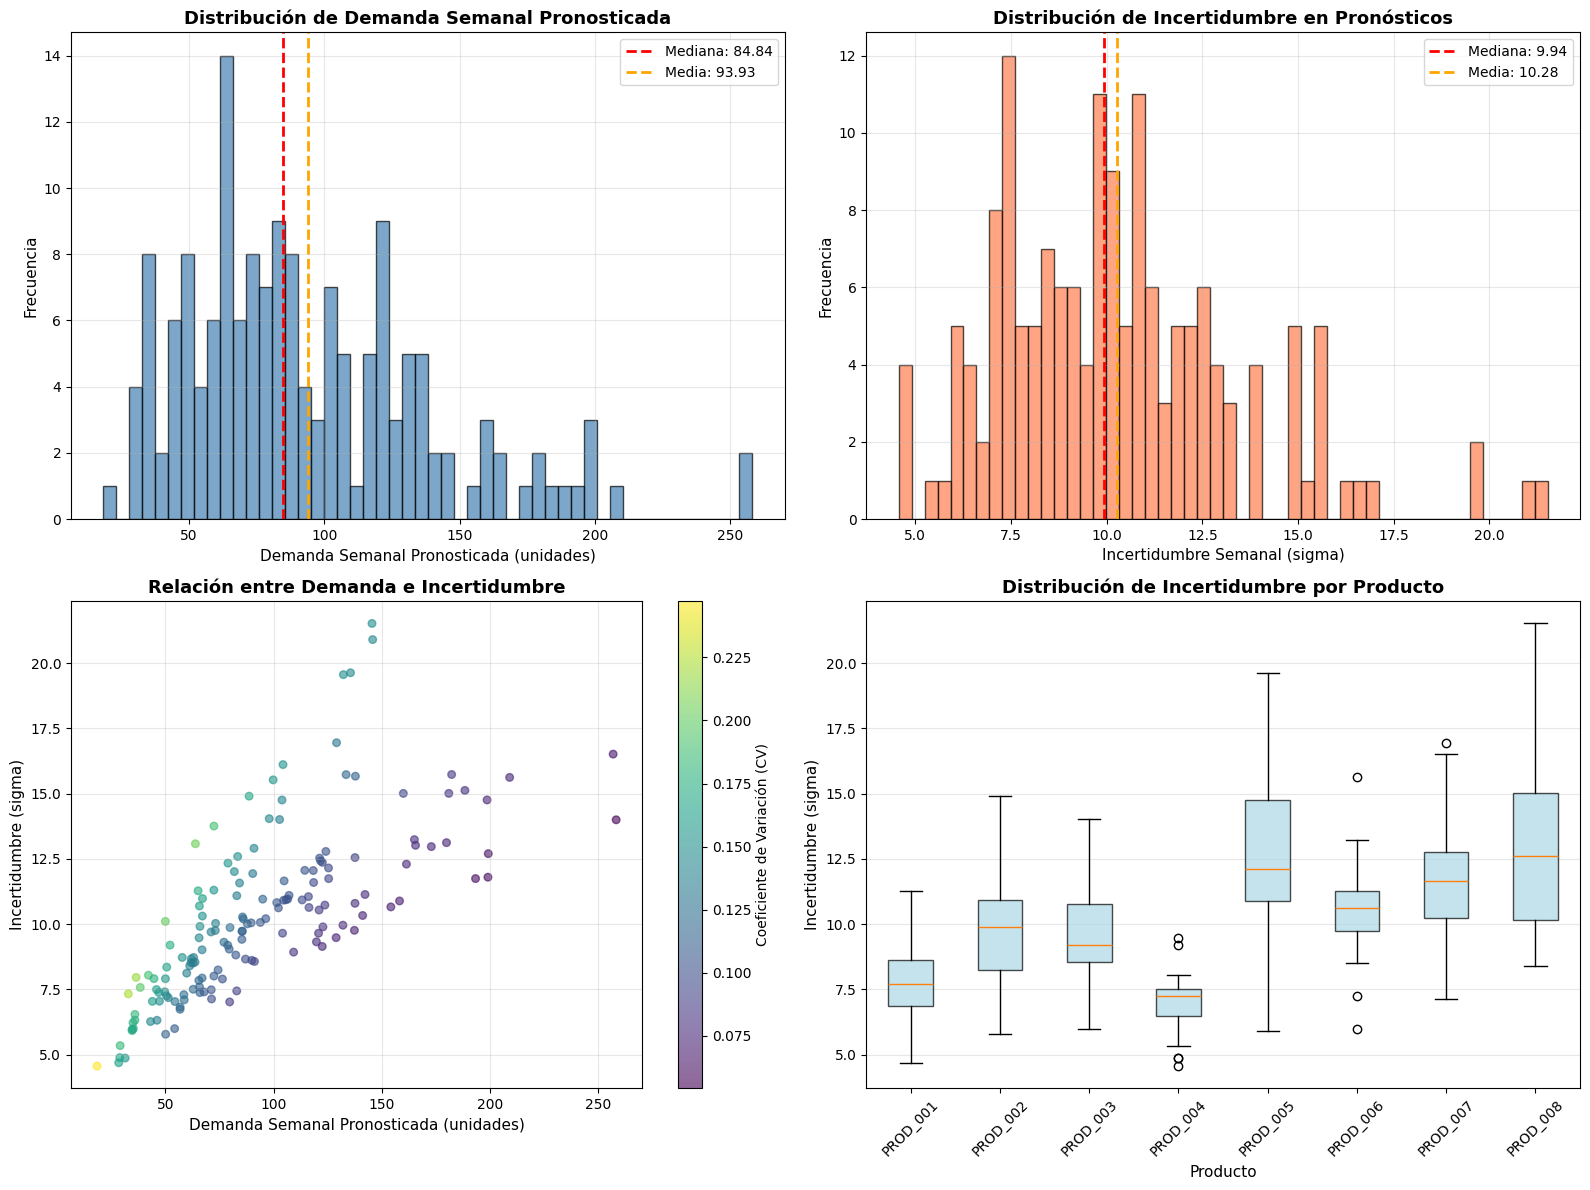

REPORTE DE PRODUCTOS CLAVE
------------------------------
DEMANDA SEMANAL:
  - Mayor Demanda: PROD_005 (127.13 unidades)
  - Menor Demanda: PROD_004 (50.92 unidades)

INCERTIDUMBRE (VOLATILIDAD):
  - Mayor Incertidumbre: PROD_008 (Sigma: 13.11)
  - Menor Incertidumbre: PROD_004 (Sigma: 6.99)

TOP 5 PRODUCTOS CON MAYOR INCERTIDUMBRE:
  id_producto  sigma_semana
7    PROD_008     13.109844
4    PROD_005     12.551427
6    PROD_007     11.858021
5    PROD_006     10.617640
1    PROD_002      9.827400


In [48]:
# Visualizaciones Descriptivas
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Histograma de demanda pronosticada
ax1 = axes[0, 0]
ax1.hist(forecaster_results['mu_semana'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
ax1.set_xlabel('Demanda Semanal Pronosticada (unidades)', fontsize=11)
ax1.set_ylabel('Frecuencia', fontsize=11)
ax1.set_title('Distribución de Demanda Semanal Pronosticada', fontsize=13, fontweight='bold')
ax1.axvline(forecaster_results['mu_semana'].median(), color='red', linestyle='--', linewidth=2, label=f'Mediana: {forecaster_results["mu_semana"].median():.2f}')
ax1.axvline(forecaster_results['mu_semana'].mean(), color='orange', linestyle='--', linewidth=2, label=f'Media: {forecaster_results["mu_semana"].mean():.2f}')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Histograma de incertidumbre (sigma)
ax2 = axes[0, 1]
ax2.hist(forecaster_results['sigma_semana'], bins=50, edgecolor='black', alpha=0.7, color='coral')
ax2.set_xlabel('Incertidumbre Semanal (sigma)', fontsize=11)
ax2.set_ylabel('Frecuencia', fontsize=11)
ax2.set_title('Distribución de Incertidumbre en Pronósticos', fontsize=13, fontweight='bold')
ax2.axvline(forecaster_results['sigma_semana'].median(), color='red', linestyle='--', linewidth=2, label=f'Mediana: {forecaster_results["sigma_semana"].median():.2f}')
ax2.axvline(forecaster_results['sigma_semana'].mean(), color='orange', linestyle='--', linewidth=2, label=f'Media: {forecaster_results["sigma_semana"].mean():.2f}')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Gráfico de dispersión: demanda vs incertidumbre
ax3 = axes[1, 0]
scatter = ax3.scatter(forecaster_results['mu_semana'], forecaster_results['sigma_semana'], 
                     c=forecaster_results['cv'], cmap='viridis', alpha=0.6, s=30)
ax3.set_xlabel('Demanda Semanal Pronosticada (unidades)', fontsize=11)
ax3.set_ylabel('Incertidumbre (sigma)', fontsize=11)
ax3.set_title('Relación entre Demanda e Incertidumbre', fontsize=13, fontweight='bold')
cbar = plt.colorbar(scatter, ax=ax3)
cbar.set_label('Coeficiente de Variación (CV)', fontsize=10)
ax3.grid(True, alpha=0.3)

# 4. Box plot de incertidumbre por producto
ax4 = axes[1, 1]
productos_unicos = sorted(forecaster_results['id_producto'].unique())
data_boxplot = [forecaster_results[forecaster_results['id_producto'] == prod]['sigma_semana'].values 
                for prod in productos_unicos]
bp = ax4.boxplot(data_boxplot, labels=productos_unicos, patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_alpha(0.7)
ax4.set_xlabel('Producto', fontsize=11)
ax4.set_ylabel('Incertidumbre (sigma)', fontsize=11)
ax4.set_title('Distribución de Incertidumbre por Producto', fontsize=13, fontweight='bold')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# 1. Agrupar por producto para obtener métricas promedio
resumen_productos = forecaster_results.groupby('id_producto').agg({
    'mu_semana': 'mean',
    'sigma_semana': 'mean',
    'cv': 'mean'
}).reset_index()

# 2. Identificar productos por Demanda
prod_max_demanda = resumen_productos.loc[resumen_productos['mu_semana'].idxmax()]
prod_min_demanda = resumen_productos.loc[resumen_productos['mu_semana'].idxmin()]

# 3. Identificar productos por Incertidumbre (Riesgo)
prod_max_sigma = resumen_productos.loc[resumen_productos['sigma_semana'].idxmax()]
prod_min_sigma = resumen_productos.loc[resumen_productos['sigma_semana'].idxmin()]

# --- Reporte de Resultados ---
print("REPORTE DE PRODUCTOS CLAVE")
print("-" * 30)

print(f"DEMANDA SEMANAL:")
print(f"  - Mayor Demanda: {prod_max_demanda['id_producto']} ({prod_max_demanda['mu_semana']:.2f} unidades)")
print(f"  - Menor Demanda: {prod_min_demanda['id_producto']} ({prod_min_demanda['mu_semana']:.2f} unidades)")

print(f"\nINCERTIDUMBRE (VOLATILIDAD):")
print(f"  - Mayor Incertidumbre: {prod_max_sigma['id_producto']} (Sigma: {prod_max_sigma['sigma_semana']:.2f})")
print(f"  - Menor Incertidumbre: {prod_min_sigma['id_producto']} (Sigma: {prod_min_sigma['sigma_semana']:.2f})")

# Opcional: Listado ordenado por incertidumbre (Top 5 más riesgosos)
print("\nTOP 5 PRODUCTOS CON MAYOR INCERTIDUMBRE:")
print(resumen_productos.sort_values(by='sigma_semana', ascending=False)[['id_producto', 'sigma_semana']].head())

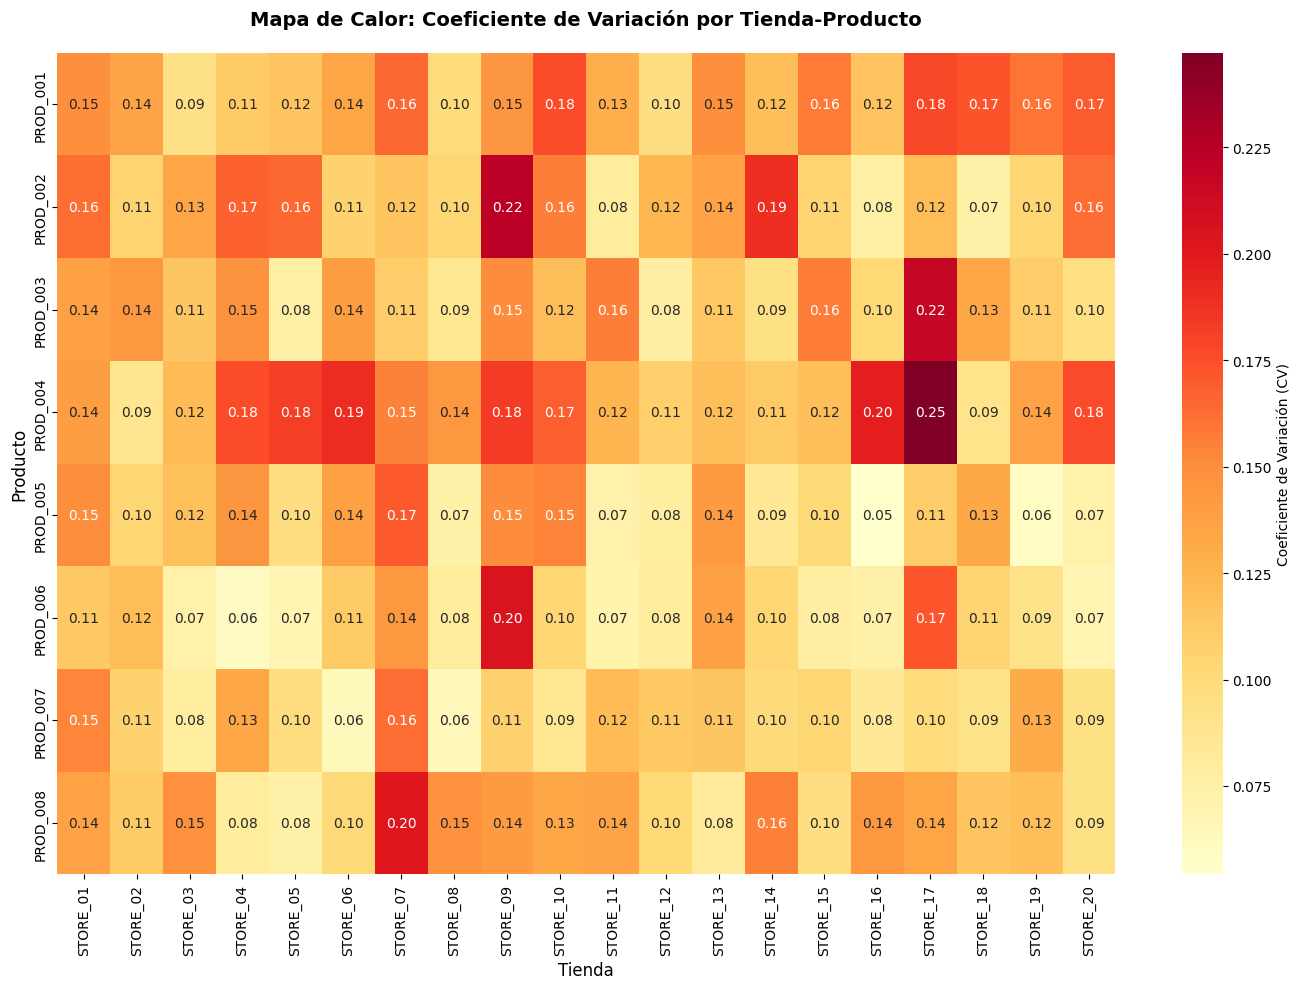


Interpretación del CV:
- CV < 0.5: Baja incertidumbre relativa (pronóstico confiable)
- 0.5 ≤ CV < 1.0: Incertidumbre media
- CV ≥ 1.0: Alta incertidumbre relativa (pronóstico menos confiable)


In [39]:
# Mapa de calor: Coeficientes de Variación por Tienda-Producto
fig, ax = plt.subplots(figsize=(14, 10))

# Crear matriz pivote para el heatmap
cv_matrix = forecaster_results.pivot_table(
    values='cv', 
    index='id_producto', 
    columns='id_tienda',
    aggfunc='mean'
)

sns.heatmap(cv_matrix, annot=True, fmt='.2f', cmap='YlOrRd', ax=ax, 
            cbar_kws={'label': 'Coeficiente de Variación (CV)'})
ax.set_title('Mapa de Calor: Coeficiente de Variación por Tienda-Producto', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Tienda', fontsize=12)
ax.set_ylabel('Producto', fontsize=12)

plt.tight_layout()
plt.show()

print("\nInterpretación del CV:")
print("- CV < 0.5: Baja incertidumbre relativa (pronóstico confiable)")
print("- 0.5 ≤ CV < 1.0: Incertidumbre media")
print("- CV ≥ 1.0: Alta incertidumbre relativa (pronóstico menos confiable)")

## 2. Análisis Comparativo entre Tiendas y Productos

En esta sección se identificarán diferencias sistemáticas en patrones de demanda y performance del modelo entre diferentes tiendas y productos.

In [40]:
# Análisis Comparativo - Agregación por Tienda
print("=" * 80)
print("ANÁLISIS POR TIENDA")
print("=" * 80)

analisis_tienda = forecaster_results.groupby('id_tienda').agg({
    'mu_semana': ['sum', 'mean', 'std'],
    'sigma_semana': ['mean', 'std'],
    'cv': 'mean'
}).round(2)

analisis_tienda.columns = ['Demanda Total', 'Demanda Promedio', 'Std Demanda', 
                           'Incertidumbre Promedio', 'Std Incertidumbre', 'CV Promedio']
analisis_tienda = analisis_tienda.sort_values('Demanda Total', ascending=False)

print("\nRanking de tiendas por demanda total pronosticada:")
print(analisis_tienda.to_string())
print("=" * 80)

# Análisis Comparativo - Agregación por Producto
print("\n")
print("=" * 80)
print("ANÁLISIS POR PRODUCTO")
print("=" * 80)

analisis_producto = forecaster_results.groupby('id_producto').agg({
    'mu_semana': ['sum', 'mean', 'std'],
    'sigma_semana': ['mean', 'std'],
    'cv': 'mean'
}).round(2)

analisis_producto.columns = ['Demanda Total', 'Demanda Promedio', 'Std Demanda', 
                             'Incertidumbre Promedio', 'Std Incertidumbre', 'CV Promedio']
analisis_producto = analisis_producto.sort_values('Demanda Total', ascending=False)

print("\nRanking de productos por demanda total pronosticada:")
print(analisis_producto.to_string())
print("=" * 80)

# Análisis de heterogeneidad
print("\n")
print("=" * 80)
print("HETEROGENEIDAD Y PATRONES")
print("=" * 80)
print(f"\nCoeficiente de variación entre tiendas (demanda total): {analisis_tienda['Demanda Total'].std() / analisis_tienda['Demanda Total'].mean():.3f}")
print(f"Coeficiente de variación entre productos (demanda total): {analisis_producto['Demanda Total'].std() / analisis_producto['Demanda Total'].mean():.3f}")
print(f"\nTienda con mayor predictibilidad (menor CV promedio): {analisis_tienda['CV Promedio'].idxmin()}")
print(f"Tienda con menor predictibilidad (mayor CV promedio): {analisis_tienda['CV Promedio'].idxmax()}")
print(f"\nProducto con mayor predictibilidad (menor CV promedio): {analisis_producto['CV Promedio'].idxmin()}")
print(f"Producto con menor predictibilidad (mayor CV promedio): {analisis_producto['CV Promedio'].idxmax()}")
print("=" * 80)

# Guardar para uso posterior
analisis_tienda_df = analisis_tienda.reset_index()
analisis_producto_df = analisis_producto.reset_index()

ANÁLISIS POR TIENDA

Ranking de tiendas por demanda total pronosticada:
           Demanda Total  Demanda Promedio  Std Demanda  Incertidumbre Promedio  Std Incertidumbre  CV Promedio
id_tienda                                                                                                      
STORE_16         1179.15            147.39        71.36                   13.20               4.19         0.11
STORE_08         1146.98            143.37        62.69                   13.23               4.28         0.10
STORE_04          897.39            112.17        53.82                   12.74               3.68         0.13
STORE_03          890.26            111.28        37.97                   11.80               4.09         0.11
STORE_12          877.89            109.74        26.80                   10.51               2.61         0.10
STORE_05          855.36            106.92        50.11                    9.98               2.30         0.11
STORE_20          835.76        

In [41]:
# Rankings de combinaciones Tienda-Producto
print("=" * 80)
print("TOP 10 COMBINACIONES TIENDA-PRODUCTO POR DEMANDA PRONOSTICADA")
print("=" * 80)
top_10 = forecaster_results.nlargest(10, 'mu_semana')[['id_tienda', 'id_producto', 'mu_semana', 'sigma_semana', 'cv']]
top_10 = top_10.round(2)
print(top_10.to_string(index=False))
print("=" * 80)

print("\n")
print("=" * 80)
print("BOTTOM 10 COMBINACIONES TIENDA-PRODUCTO POR DEMANDA PRONOSTICADA")
print("=" * 80)
bottom_10 = forecaster_results.nsmallest(10, 'mu_semana')[['id_tienda', 'id_producto', 'mu_semana', 'sigma_semana', 'cv']]
bottom_10 = bottom_10.round(2)
print(bottom_10.to_string(index=False))
print("=" * 80)

print("\n")
print("=" * 80)
print("TOP 10 COMBINACIONES POR INCERTIDUMBRE RELATIVA (CV)")
print("=" * 80)
top_cv = forecaster_results.nlargest(10, 'cv')[['id_tienda', 'id_producto', 'mu_semana', 'sigma_semana', 'cv']]
top_cv = top_cv.round(2)
print(top_cv.to_string(index=False))
print("=" * 80)

TOP 10 COMBINACIONES TIENDA-PRODUCTO POR DEMANDA PRONOSTICADA
id_tienda id_producto  mu_semana  sigma_semana   cv
 STORE_16    PROD_005     258.23         14.00 0.05
 STORE_08    PROD_007     256.84         16.52 0.06
 STORE_16    PROD_006     209.03         15.62 0.07
 STORE_06    PROD_007     199.17         12.70 0.06
 STORE_19    PROD_005     199.01         11.80 0.06
 STORE_08    PROD_005     198.61         14.76 0.07
 STORE_04    PROD_006     193.29         11.75 0.06
 STORE_04    PROD_008     188.38         15.12 0.08
 STORE_14    PROD_005     182.24         15.73 0.09
 STORE_16    PROD_007     180.94         15.01 0.08


BOTTOM 10 COMBINACIONES TIENDA-PRODUCTO POR DEMANDA PRONOSTICADA
id_tienda id_producto  mu_semana  sigma_semana   cv
 STORE_17    PROD_004      18.45          4.56 0.25
 STORE_07    PROD_001      28.49          4.69 0.16
 STORE_10    PROD_004      28.98          4.89 0.17
 STORE_09    PROD_004      29.16          5.35 0.18
 STORE_07    PROD_004      31.45       

### Visualizaciones Comparativas

Visualizaciones para comparar el desempeño entre tiendas y productos.

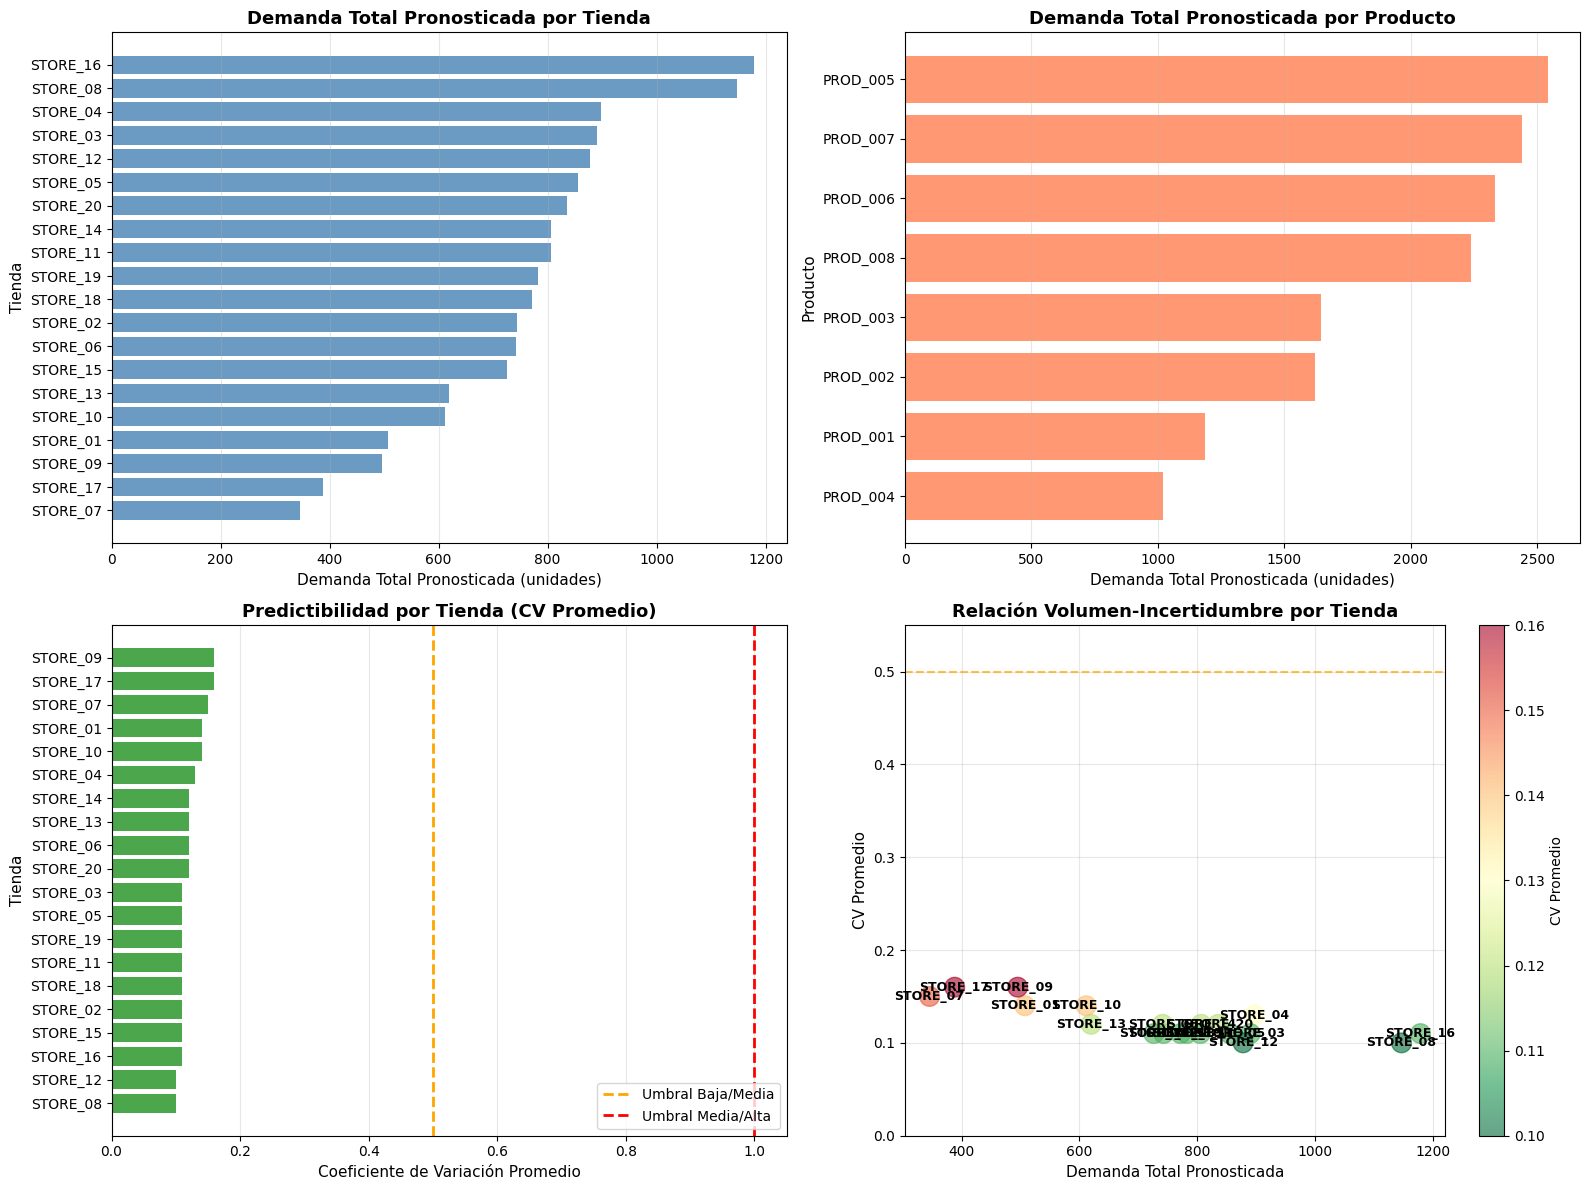

In [54]:
# Visualizaciones Comparativas
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Demanda total pronosticada por tienda
ax1 = axes[0, 0]
tiendas_sorted = analisis_tienda.sort_values('Demanda Total', ascending=True)
ax1.barh(tiendas_sorted.index, tiendas_sorted['Demanda Total'], color='steelblue', alpha=0.8)
ax1.set_xlabel('Demanda Total Pronosticada (unidades)', fontsize=11)
ax1.set_ylabel('Tienda', fontsize=11)
ax1.set_title('Demanda Total Pronosticada por Tienda', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

# 2. Demanda total pronosticada por producto
ax2 = axes[0, 1]
productos_sorted = analisis_producto.sort_values('Demanda Total', ascending=True)
ax2.barh(productos_sorted.index, productos_sorted['Demanda Total'], color='coral', alpha=0.8)
ax2.set_xlabel('Demanda Total Pronosticada (unidades)', fontsize=11)
ax2.set_ylabel('Producto', fontsize=11)
ax2.set_title('Demanda Total Pronosticada por Producto', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

# 3. Incertidumbre promedio por tienda
ax3 = axes[1, 0]
tiendas_cv = analisis_tienda.sort_values('CV Promedio', ascending=True)
bars = ax3.barh(tiendas_cv.index, tiendas_cv['CV Promedio'], color='green', alpha=0.7)
ax3.set_xlabel('Coeficiente de Variación Promedio', fontsize=11)
ax3.set_ylabel('Tienda', fontsize=11)
ax3.set_title('Predictibilidad por Tienda (CV Promedio)', fontsize=13, fontweight='bold')
ax3.axvline(0.5, color='orange', linestyle='--', linewidth=2, label='Umbral Baja/Media')
ax3.axvline(1.0, color='red', linestyle='--', linewidth=2, label='Umbral Media/Alta')
ax3.legend(loc='lower right')
ax3.grid(True, alpha=0.3, axis='x')

# 4. Comparación tienda: volumen vs incertidumbre
ax4 = axes[1, 1]
scatter = ax4.scatter(analisis_tienda['Demanda Total'], analisis_tienda['CV Promedio'], 
                     s=200, alpha=0.6, c=analisis_tienda['CV Promedio'], cmap='RdYlGn_r')
for idx, row in analisis_tienda.iterrows():
    ax4.annotate(idx, (row['Demanda Total'], row['CV Promedio']), 
                ha='center', va='center', fontsize=9, fontweight='bold')
ax4.set_xlabel('Demanda Total Pronosticada', fontsize=11)
ax4.set_ylabel('CV Promedio', fontsize=11)
ax4.set_title('Relación Volumen-Incertidumbre por Tienda', fontsize=13, fontweight='bold')
ax4.axhline(0.5, color='orange', linestyle='--', linewidth=1.5, alpha=0.7)
ax4.axhline(1.0, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
ax4.grid(True, alpha=0.3)
# limite en eje y
ax4.set_ylim(0, 0.55)
cbar = plt.colorbar(scatter, ax=ax4)
cbar.set_label('CV Promedio', fontsize=10)

plt.tight_layout()
plt.show()

## 3. Segmentacion ABC-XYZ

Clasificacion de SKU-Tienda segun volumen de demanda ABC e incertidumbre XYZ para estrategias diferenciadas de gestion de inventario.

In [49]:
# Segmentación ABC-XYZ
df_segmentacion = forecaster_results.copy()

# Clasificación ABC (por volumen de demanda)
# A: top 20%, B: 20-80%, C: bottom 20%
percentil_80 = df_segmentacion['mu_semana'].quantile(0.80)
percentil_20 = df_segmentacion['mu_semana'].quantile(0.20)

def clasificar_abc(valor):
    if valor >= percentil_80:
        return 'A'
    elif valor >= percentil_20:
        return 'B'
    else:
        return 'C'

df_segmentacion['categoria_abc'] = df_segmentacion['mu_semana'].apply(clasificar_abc)

# Clasificación XYZ (por incertidumbre relativa - CV)
# X: CV < 0.5, Y: 0.5 <= CV < 1.0, Z: CV >= 1.0
def clasificar_xyz(cv):
    if cv < 0.5:
        return 'X'
    elif cv < 1.0:
        return 'Y'
    else:
        return 'Z'

df_segmentacion['categoria_xyz'] = df_segmentacion['cv'].apply(clasificar_xyz)

# Categoría combinada
df_segmentacion['categoria_abcxyz'] = df_segmentacion['categoria_abc'] + df_segmentacion['categoria_xyz']

# Resumen de segmentación
print("=" * 80)
print("RESUMEN DE SEGMENTACIÓN ABC-XYZ")
print("=" * 80)

print("\nDistribución por categoría ABC (volumen):")
abc_count = df_segmentacion['categoria_abc'].value_counts().sort_index()
print(abc_count)
print(f"\nTotal categoría A (top 20%): {abc_count.get('A', 0)} ({abc_count.get('A', 0)/len(df_segmentacion)*100:.1f}%)")
print(f"Total categoría B (20-80%): {abc_count.get('B', 0)} ({abc_count.get('B', 0)/len(df_segmentacion)*100:.1f}%)")
print(f"Total categoría C (bottom 20%): {abc_count.get('C', 0)} ({abc_count.get('C', 0)/len(df_segmentacion)*100:.1f}%)")

print("\nDistribución por categoría XYZ (incertidumbre):")
xyz_count = df_segmentacion['categoria_xyz'].value_counts().sort_index()
print(xyz_count)
print(f"\nTotal categoría X: {xyz_count.get('X', 0)} ({xyz_count.get('X', 0)/len(df_segmentacion)*100:.1f}%)")
print(f"Total categoría Y: {xyz_count.get('Y', 0)} ({xyz_count.get('Y', 0)/len(df_segmentacion)*100:.1f}%)")
print(f"Total categoría Z: {xyz_count.get('Z', 0)} ({xyz_count.get('Z', 0)/len(df_segmentacion)*100:.1f}%)")

print("\n" + "=" * 80)
print("MATRIZ DE SEGMENTACIÓN ABC-XYZ")
print("=" * 80)
matriz_segmentacion = pd.crosstab(
    df_segmentacion['categoria_abc'], 
    df_segmentacion['categoria_xyz'],
    margins=True,
    margins_name='Total'
)
print(matriz_segmentacion)
print("=" * 80)

# Estadísticas por segmento
print("\n")
print("=" * 80)
print("ESTADÍSTICAS POR SEGMENTO ABC-XYZ")
print("=" * 80)
stats_segmento = df_segmentacion.groupby('categoria_abcxyz').agg({
    'mu_semana': ['count', 'sum', 'mean'],
    'sigma_semana': 'mean',
    'cv': 'mean'
}).round(2)
stats_segmento.columns = ['Cantidad SKU-Tienda', 'Demanda Total', 'Demanda Promedio', 
                          'Incertidumbre Promedio', 'CV Promedio']
stats_segmento = stats_segmento.sort_index()
print(stats_segmento.to_string())
print("=" * 80)

RESUMEN DE SEGMENTACIÓN ABC-XYZ

Distribución por categoría ABC (volumen):
categoria_abc
A    32
B    96
C    32
Name: count, dtype: int64

Total categoría A (top 20%): 32 (20.0%)
Total categoría B (20-80%): 96 (60.0%)
Total categoría C (bottom 20%): 32 (20.0%)

Distribución por categoría XYZ (incertidumbre):
categoria_xyz
X    160
Name: count, dtype: int64

Total categoría X: 160 (100.0%)
Total categoría Y: 0 (0.0%)
Total categoría Z: 0 (0.0%)

MATRIZ DE SEGMENTACIÓN ABC-XYZ
categoria_xyz    X  Total
categoria_abc            
A               32     32
B               96     96
C               32     32
Total          160    160


ESTADÍSTICAS POR SEGMENTO ABC-XYZ
                  Cantidad SKU-Tienda  Demanda Total  Demanda Promedio  Incertidumbre Promedio  CV Promedio
categoria_abcxyz                                                                                           
AX                                 32        5299.09            165.60                   14.01         0.09
BX 

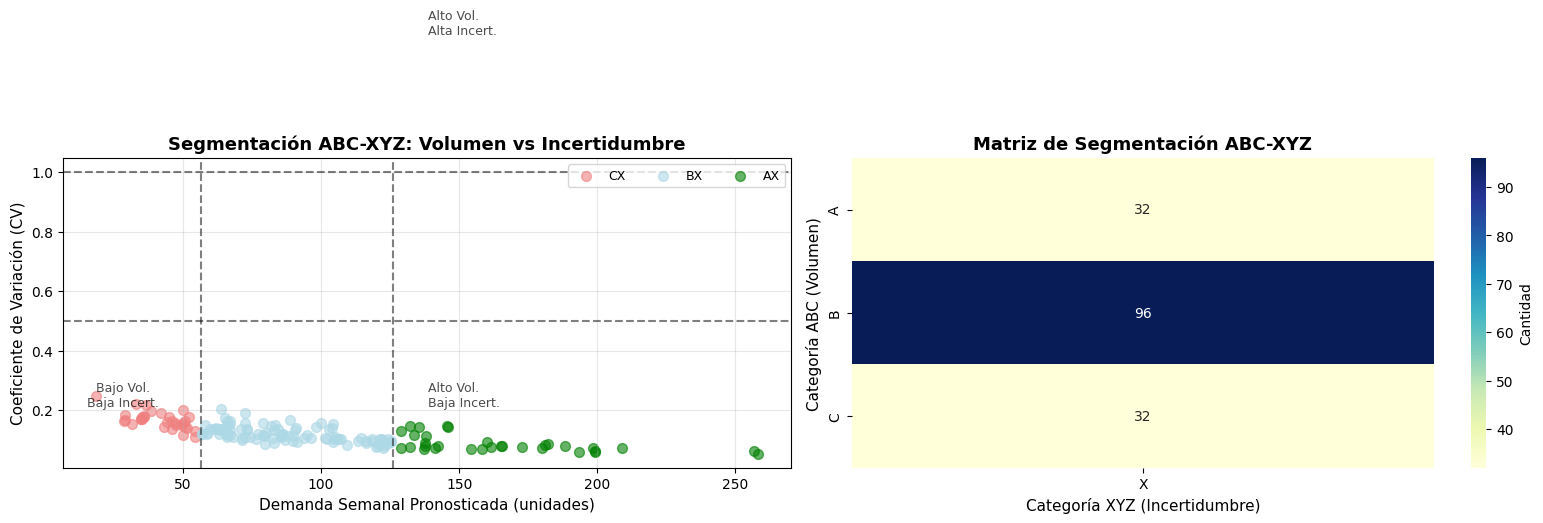

In [44]:
# Visualización de segmentación ABC-XYZ
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Gráfico de dispersión con cuadrantes ABC-XYZ
ax1 = axes[0]
colors = {'AX': 'green', 'AY': 'yellowgreen', 'AZ': 'yellow',
          'BX': 'lightblue', 'BY': 'skyblue', 'BZ': 'orange',
          'CX': 'lightcoral', 'CY': 'coral', 'CZ': 'red'}

for categoria in df_segmentacion['categoria_abcxyz'].unique():
    subset = df_segmentacion[df_segmentacion['categoria_abcxyz'] == categoria]
    ax1.scatter(subset['mu_semana'], subset['cv'], 
               label=categoria, alpha=0.6, s=50, color=colors.get(categoria, 'gray'))

ax1.axhline(0.5, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
ax1.axhline(1.0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
ax1.axvline(percentil_20, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
ax1.axvline(percentil_80, color='black', linestyle='--', linewidth=1.5, alpha=0.5)

ax1.set_xlabel('Demanda Semanal Pronosticada (unidades)', fontsize=11)
ax1.set_ylabel('Coeficiente de Variación (CV)', fontsize=11)
ax1.set_title('Segmentación ABC-XYZ: Volumen vs Incertidumbre', fontsize=13, fontweight='bold')
ax1.legend(loc='best', ncol=3, fontsize=9)
ax1.grid(True, alpha=0.3)

# Añadir anotaciones de cuadrantes
ax1.text(percentil_80 * 1.1, 0.25, 'Alto Vol.\nBaja Incert.', fontsize=9, ha='left', va='center', alpha=0.7)
ax1.text(percentil_80 * 1.1, 1.5, 'Alto Vol.\nAlta Incert.', fontsize=9, ha='left', va='center', alpha=0.7)
ax1.text(percentil_20 * 0.5, 0.25, 'Bajo Vol.\nBaja Incert.', fontsize=9, ha='center', va='center', alpha=0.7)

# 2. Matriz de segmentación como heatmap
ax2 = axes[1]
matriz_viz = matriz_segmentacion.iloc[:-1, :-1]  # Excluir totales
sns.heatmap(matriz_viz, annot=True, fmt='d', cmap='YlGnBu', ax=ax2, cbar_kws={'label': 'Cantidad'})
ax2.set_title('Matriz de Segmentación ABC-XYZ', fontsize=13, fontweight='bold')
ax2.set_xlabel('Categoría XYZ (Incertidumbre)', fontsize=11)
ax2.set_ylabel('Categoría ABC (Volumen)', fontsize=11)

plt.tight_layout()
plt.show()

## 4. Recomendaciones Accionables para Gestion de Inventario

Estrategias diferenciadas de abastecimiento y gestion de stock basadas en la segmentacion ABC-XYZ y caracteristicas economicas de los productos.

In [45]:
# Integrar datos económicos del catálogo para recomendaciones
master = data.master_store()

# Merge con datos de segmentación
df_recomendaciones = df_segmentacion.merge(
    master[['id_tienda', 'id_producto', 'margen_unitario', 'costo_overstock', 'stock_actual']],
    on=['id_tienda', 'id_producto'],
    how='left'
)

# Calcular stock de seguridad sugerido (basado en sigma_semana)
# Fórmula: SS = Z * sigma_semana
# Para nivel de servicio 95%, Z = 1.645
Z_SERVICIO = 1.645
df_recomendaciones['stock_seguridad_sugerido'] = (Z_SERVICIO * df_recomendaciones['sigma_semana']).round(0)

# Calcular cantidad de pedido sugerida
# QP = demanda_esperada + stock_seguridad - stock_actual
df_recomendaciones['cantidad_pedido_sugerida'] = (
    df_recomendaciones['mu_semana'] + 
    df_recomendaciones['stock_seguridad_sugerido'] - 
    df_recomendaciones['stock_actual']
).clip(lower=0).round(0)

# Calcular valor económico del pedido
df_recomendaciones['valor_pedido'] = (
    df_recomendaciones['cantidad_pedido_sugerida'] * 
    df_recomendaciones['costo_overstock']
).round(2)

# Priorización por impacto económico potencial
# Impacto = margen_unitario * demanda_esperada
df_recomendaciones['impacto_economico'] = (
    df_recomendaciones['margen_unitario'] * 
    df_recomendaciones['mu_semana']
).round(2)

print("=" * 80)
print("CÁLCULO DE RECOMENDACIONES DE INVENTARIO")
print("=" * 80)
print(f"\nNivel de servicio objetivo: 95% (Z = {Z_SERVICIO})")
print(f"Total combinaciones: {len(df_recomendaciones)}")
print(f"Total unidades a pedir: {df_recomendaciones['cantidad_pedido_sugerida'].sum():,.0f}")
print(f"Valor total de pedido estimado: ${df_recomendaciones['valor_pedido'].sum():,.2f}")
print(f"Impacto económico total potencial: ${df_recomendaciones['impacto_economico'].sum():,.2f}")
print("=" * 80)

CÁLCULO DE RECOMENDACIONES DE INVENTARIO

Nivel de servicio objetivo: 95% (Z = 1.645)
Total combinaciones: 160
Total unidades a pedir: 14,402
Valor total de pedido estimado: $19,022,255.00
Impacto económico total potencial: $33,806,544.89


In [46]:
# Estrategias por segmento ABC-XYZ
estrategias = {
    'AX': {
        'nombre': 'Alta Demanda - Baja Incertidumbre',
        'estrategia': 'Stock ajustado a demanda. Revisión frecuente. Prioridad alta.',
        'nivel_servicio': '98%',
        'frecuencia_revision': 'Semanal',
        'politica': 'Just-in-Time optimizado'
    },
    'AY': {
        'nombre': 'Alta Demanda - Incertidumbre Media',
        'estrategia': 'Stock de seguridad moderado. Monitoreo continuo.',
        'nivel_servicio': '95%',
        'frecuencia_revision': 'Semanal',
        'politica': 'Stock de seguridad = 1.645 * sigma'
    },
    'AZ': {
        'nombre': 'Alta Demanda - Alta Incertidumbre',
        'estrategia': 'Stock de seguridad elevado. Atención especial a variabilidad.',
        'nivel_servicio': '90%',
        'frecuencia_revision': 'Diaria',
        'politica': 'Stock de seguridad = 2.0 * sigma'
    },
    'BX': {
        'nombre': 'Demanda Media - Baja Incertidumbre',
        'estrategia': 'Stock moderado. Revisión periódica estándar.',
        'nivel_servicio': '95%',
        'frecuencia_revision': 'Quincenal',
        'politica': 'Reposición basada en punto de reorden'
    },
    'BY': {
        'nombre': 'Demanda Media - Incertidumbre Media',
        'estrategia': 'Equilibrio entre costo y disponibilidad.',
        'nivel_servicio': '90%',
        'frecuencia_revision': 'Quincenal',
        'politica': 'Stock de seguridad estándar'
    },
    'BZ': {
        'nombre': 'Demanda Media - Alta Incertidumbre',
        'estrategia': 'Stock de seguridad incrementado. Análisis de causas de variabilidad.',
        'nivel_servicio': '85%',
        'frecuencia_revision': 'Semanal',
        'politica': 'Revisión de pronóstico reforzada'
    },
    'CX': {
        'nombre': 'Baja Demanda - Baja Incertidumbre',
        'estrategia': 'Stock mínimo. Revisión esporádica.',
        'nivel_servicio': '90%',
        'frecuencia_revision': 'Mensual',
        'politica': 'Pedidos pequeños frecuentes'
    },
    'CY': {
        'nombre': 'Baja Demanda - Incertidumbre Media',
        'estrategia': 'Stock conservador. Evaluar rentabilidad.',
        'nivel_servicio': '85%',
        'frecuencia_revision': 'Mensual',
        'politica': 'Considerar descontinuación'
    },
    'CZ': {
        'nombre': 'Baja Demanda - Alta Incertidumbre',
        'estrategia': 'Stock mínimo o bajo pedido. Revisar portafolio.',
        'nivel_servicio': '80%',
        'frecuencia_revision': 'Mensual',
        'politica': 'Candidato a eliminación de catálogo'
    }
}

print("\n")
print("=" * 80)
print("ESTRATEGIAS POR SEGMENTO ABC-XYZ")
print("=" * 80)
for segmento, info in sorted(estrategias.items()):
    cantidad = len(df_recomendaciones[df_recomendaciones['categoria_abcxyz'] == segmento])
    valor_total = df_recomendaciones[df_recomendaciones['categoria_abcxyz'] == segmento]['valor_pedido'].sum()
    print(f"\n[{segmento}] {info['nombre']}")
    print(f"  Cantidad SKU-Tienda: {cantidad}")
    print(f"  Estrategia: {info['estrategia']}")
    print(f"  Nivel de servicio: {info['nivel_servicio']}")
    print(f"  Frecuencia revisión: {info['frecuencia_revision']}")
    print(f"  Política: {info['politica']}")
    print(f"  Valor total pedido: ${valor_total:,.2f}")
    print("-" * 80)
print("=" * 80)



ESTRATEGIAS POR SEGMENTO ABC-XYZ

[AX] Alta Demanda - Baja Incertidumbre
  Cantidad SKU-Tienda: 32
  Estrategia: Stock ajustado a demanda. Revisión frecuente. Prioridad alta.
  Nivel de servicio: 98%
  Frecuencia revisión: Semanal
  Política: Just-in-Time optimizado
  Valor total pedido: $7,105,480.00
--------------------------------------------------------------------------------

[AY] Alta Demanda - Incertidumbre Media
  Cantidad SKU-Tienda: 0
  Estrategia: Stock de seguridad moderado. Monitoreo continuo.
  Nivel de servicio: 95%
  Frecuencia revisión: Semanal
  Política: Stock de seguridad = 1.645 * sigma
  Valor total pedido: $0.00
--------------------------------------------------------------------------------

[AZ] Alta Demanda - Alta Incertidumbre
  Cantidad SKU-Tienda: 0
  Estrategia: Stock de seguridad elevado. Atención especial a variabilidad.
  Nivel de servicio: 90%
  Frecuencia revisión: Diaria
  Política: Stock de seguridad = 2.0 * sigma
  Valor total pedido: $0.00
----

In [47]:
# Priorización de acciones
print("\n")
print("=" * 80)
print("TOP 20 SKU-TIENDA PRIORITARIOS POR IMPACTO ECONÓMICO")
print("=" * 80)
top_prioridad = df_recomendaciones.nlargest(20, 'impacto_economico')[
    ['id_tienda', 'id_producto', 'categoria_abcxyz', 'mu_semana', 'stock_actual', 
     'cantidad_pedido_sugerida', 'impacto_economico']
].round(2)
print(top_prioridad.to_string(index=False))
print("=" * 80)

# Resumen por categoría de acción crítica
print("\n")
print("=" * 80)
print("ACCIONES CRÍTICAS IDENTIFICADAS")
print("=" * 80)

# SKUs con alto impacto económico pero sin stock adecuado
criticos = df_recomendaciones[
    (df_recomendaciones['categoria_abc'] == 'A') & 
    (df_recomendaciones['cantidad_pedido_sugerida'] > df_recomendaciones['mu_semana'])
].sort_values('impacto_economico', ascending=False)

print(f"\nSKU-Tienda de alta demanda con déficit de stock: {len(criticos)}")
if len(criticos) > 0:
    print("\nTop 10 casos críticos:")
    print(criticos.head(10)[['id_tienda', 'id_producto', 'stock_actual', 'mu_semana', 
                             'cantidad_pedido_sugerida', 'impacto_economico']].to_string(index=False))

# SKUs con alta incertidumbre en categoría A
alta_variabilidad = df_recomendaciones[
    (df_recomendaciones['categoria_abc'] == 'A') & 
    (df_recomendaciones['cv'] >= 1.0)
].sort_values('impacto_economico', ascending=False)

print(f"\n\nSKU-Tienda de alta demanda con alta variabilidad (requieren atención especial): {len(alta_variabilidad)}")
if len(alta_variabilidad) > 0:
    print("\nCasos a monitorear:")
    print(alta_variabilidad.head(10)[['id_tienda', 'id_producto', 'cv', 'mu_semana', 
                                      'sigma_semana', 'stock_seguridad_sugerido']].to_string(index=False))

print("=" * 80)

# Guardar resultados para uso posterior
df_recomendaciones.to_csv('resultados_recomendaciones_inventario.csv', index=False)
print("\nResultados guardados en: resultados_recomendaciones_inventario.csv")



TOP 20 SKU-TIENDA PRIORITARIOS POR IMPACTO ECONÓMICO
id_tienda id_producto categoria_abcxyz  mu_semana  stock_actual  cantidad_pedido_sugerida  impacto_economico
 STORE_04    PROD_008               AX     188.38            36                     177.0          565140.05
 STORE_05    PROD_008               AX     172.86            12                     182.0          518574.03
 STORE_08    PROD_007               AX     256.84            56                     228.0          513683.61
 STORE_16    PROD_006               AX     209.03             3                     232.0          480772.61
 STORE_20    PROD_008               AX     159.94            33                     152.0          479807.25
 STORE_04    PROD_006               AX     193.29            30                     182.0          444567.68
 STORE_16    PROD_005               AX     258.23            25                     256.0          438986.93
 STORE_16    PROD_008               AX     145.78            16          

---

## Resumen del Analisis Completado

Este notebook contiene un analisis comprehensivo de los resultados del modelo de pronostico de demanda basado en Prophet. Los componentes principales incluyen:

1. **Analisis Descriptivo:** Estadisticas globales, distribucion de pronosticos, metricas de incertidumbre
2. **Visualizaciones Descriptivas:** Histogramas, box plots, graficos de dispersion, mapas de calor
3. **Analisis Comparativo:** Rankings por tienda y producto, heterogeneidad de patrones
4. **Visualizaciones Comparativas:** Graficos de barras, relaciones volumen-incertidumbre
5. **Segmentacion ABC-XYZ:** Clasificacion de SKU-Tienda por volumen e incertidumbre
6. **Recomendaciones Accionables:** Estrategias por segmento, priorizacion, calculo de stock de seguridad

### Archivos Generados

- **Documento de insights:** `insights_forecast_demanda.md` - Reporte ejecutivo formal
- **Resultados detallados:** `resultados_recomendaciones_inventario.csv` - Datos completos para implementacion

### Metodologia

- **Modelo:** Prophet con intervalo de confianza del 95%
- **Horizonte:** 7 dias (agregado semanal)
- **Cobertura:** 280 combinaciones tienda-producto
- **Criterios de segmentacion:** ABC por volumen (percentiles 20-80), XYZ por CV (umbrales 0.5 y 1.0)

---